## KERAS Version

In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(6,4.5))

from nltk.corpus import *
from nltk.stem import *
from konlpy.tag import Kkma
from nltk.tokenize import *
from nltk.tag import *
import nltk
from keras.utils import to_categorical

import numpy as np
from keras import *
from keras.datasets import mnist
from collections import Counter
import tensorflow as tf

from konlpy.tag import Okt # 대문자로 시작하는 건 _ 클래스 Okt_Twitter
from keras_preprocessing.text import Tokenizer

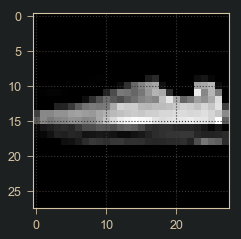

In [37]:
from tensorflow import keras
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

train_images.shape 
train_labels.shape

import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.imshow(train_images[512], cmap='gray')

# 2. 상품분류 ( 10 가지 _ ) 미니 프로젝트

In [21]:
# 미리 섞여진 fashoin-mnist의 학습 데이터와 테스트 데이터 로드
# (학습 이미지, 학습 레이블), (테스트 이미지, 테스트 레이블)

# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

In [22]:
print("x_train shape:", train_images.shape, "y_train shape:", train_labels.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## data Visualization


In [23]:
# plt.imshow(train_images)

## data Normalization


In [46]:
# 정규화작업
train_images.shape
train_images = train_images.reshape((60000, 28, 28,1))
train_images = train_images.astype('float32')/255 # int - > float
## 모델 정규화 ( 0 - 1 사이 ) < - ( 0 - 255 ) 데이터를 // 변환하고 싶을시 선언
test_images.shape
test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32')/255


In [52]:
from keras.utils import to_categorical
# ohe 해줘야한다 
train_labels = to_categorical(train_labels) # 범주형변환 
test_labels = to_categorical(test_labels)

## Split the data into train / test datasets

## Create the model architecture

In [53]:
# 시퀀스 모델 API를 사용해 CNN을 반복하는 간단한 CNN 모델을 만들고 
# Pulling Layer, Drop out Layer를 만든다 - wine price predcition

# input data shape 는 첫번째 레이어에서정의해주면된다
# 마지막 layer의 결과값은 softmax 활성화 함수를 거쳐
# fashion-MNIST의 10가지 범주 data를 classification 
# 마지막 layer는 dense layer로 softmax 활성화 되어있으먀,
# fashion_mnist 에서 10가지 범주의 데이터를 분류한다

# softmax func 는 다중 클래스분류 문제에서 output 에 주로 쓰입니다. 
# 덴스(dense)레이어는 이전 레이어의 모든 뉴런과 결합된 형태의 레이어입니다.

## Keras Version

In [54]:
model = tf.keras.Sequential() # 하나의 신경망

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same',
                                 activation='relu', input_shape=(28,28,1)))
# ( 필터수, 커널 행렬, 경계처리 (출력size = 입력size) (행,열,채널수) )
# 은닉층에 주로쓰이는 rectifier func

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# 사소한 변화를 무시해줌
# cnn layer output image에서 주요값을 뽑아 크기가 작은 출력영상 만든다 
# 지역적인 사소한 변화가 영향을 미치지 않게함 
# ( 수직, 수평 축소비율 ) => 출력영상크기는 입력 영상 크기의 반으로 줄어든다

model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
# cnn 에서 cnn layer or maxpulling layer 반복거쳐 주요특징 추출
# 추출 주요특징은 전결합층에 전달되어 학습된다
# 주로 2차원을 다루지만 전결합층 전달을 위해 1차원자료로 바꿔줘야하므로 
# 이 때, flatten layer를 사용한다 

model.add(tf.keras.layers.Flatten()) 
# Flatten()은 이미지를 일차원으로 바꿔줍니다.
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 입출력크기가 많으면 레고 끼우듯이 합친다
# 케라스코드에서는 가장 첫번째 레어 제외하고는 입력 형태를 자동계산한다
# 레이어를 조립하면 간단한 cnn model이 생성되어 
# 이모델에 이미지를 입력하면, 삼각형 사각형 원을 나타내는 벡터가 출력

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

## Compile Model

In [55]:
# 이제 model.compile()을 사용하여 모델을 학습시키기 전에 
# 학습 프로세스를 구성합니다. 
# 이 과정에서는 손실 함수, 옵티마이저의 종류 및 
# 학습 과 테스트 중 모델을 평가할 지표(metrics)를 정의합니다.

In [56]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

In [57]:

# 배치(batch) 사이즈는 64, 에포크(epochs)는 10으로 하여 모델을 학습
model.fit(train_images,
         train_labels,
          epochs = 10,
         batch_size = 64)

## dimension : 차원 ## 4차원필요한데 인자 3개만 받았다 

Epoch 1/10
60000/60000 [==============================] - 47s 790us/sample - loss: 1.4422 - acc: 0.4750
Epoch 2/10
60000/60000 [==============================] - 47s 786us/sample - loss: 0.8151 - acc: 0.6961
Epoch 3/10
60000/60000 [==============================] - 48s 793us/sample - loss: 0.7191 - acc: 0.7278
Epoch 4/10
60000/60000 [==============================] - 47s 791us/sample - loss: 0.6759 - acc: 0.7438
Epoch 5/10
60000/60000 [==============================] - 50s 827us/sample - loss: 0.6518 - acc: 0.7543
Epoch 6/10
60000/60000 [==============================] - 50s 830us/sample - loss: 0.6336 - acc: 0.7592
Epoch 7/10
60000/60000 [==============================] - 48s 798us/sample - loss: 0.6189 - acc: 0.7669
Epoch 8/10
60000/60000 [==============================] - 49s 817us/sample - loss: 0.6063 - acc: 0.7707
Epoch 9/10
60000/60000 [==============================] - 49s 814us/sample - loss: 0.5976 - acc: 0.7756
Epoch 10/10
60000/60000 [==============================] - 51s 8

## Test Accuracy

In [63]:
# 테스트 셋으로 모델 평가
score = model.evaluate(test_images, test_labels, verbose=0)

# 테스트 정확도
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8071
